# MetaInsight Explainer Demo

The MetaInsight Explainer, based on the paper [MetaInsight: Automatic Discovery of Structured Knowledge for Exploratory Data Analysis](https://dl.acm.org/doi/abs/10.1145/3448016.3457267?casa_token=iXzxYsNgOHwAAAAA:qSYNY4WlJaU1zfwvdN1OyhR7b35nb64zNxKVig9-QetRp3JsILTCrq2gt1BFpXmLCEj-7f4pMSxE) by Pingchuan Ma, Rui Ding, Shi Han and Dongmei Zhang, automatically finds and visualizes common patterns in a dataset.\
Currently, the explainer can automatically discover and visualize the following patterns:
- **Unimodality**: A common, single peak / valley in the distribution of a feature.
- **Trend**: A consistent increase or decrease in the values of a feature.
- **Outliers**: Data points that are significantly different from the rest of the data, commonly found in the feature's distribution.

Each row of the explainer's output plot represents a pattern found in the data.\
The left side of the plot will always show the common patterns found, while the right side will show any exceptions to the common patterns (if they exist).

## Import libraries and load dataset

In [1]:
import pandas as pd
import pd_explain

usetex-False


In [2]:
adults = pd.read_csv("../Datasets/adult.csv")
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Example usage - Find patterns after filtering the dataset

The explainer works by checking over the distributions of several features in the dataset, when grouped by
and aggregated by other features.\
When filtering the dataset, the explainer can automatically choose the features to group by and aggregate by selecting the ones most highly correlated with the filtered feature.\
Automatically, the explainer will use mean and standard deviation as the aggregation functions.\
To change this behavior, see the "advanced usage" section at the bottom of this notebook.\
\
Also note: the explainer uses the same behavior for join operations as it does for filtering.

In [6]:
over_30 = adults[adults["age"] > 30]
over_30

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


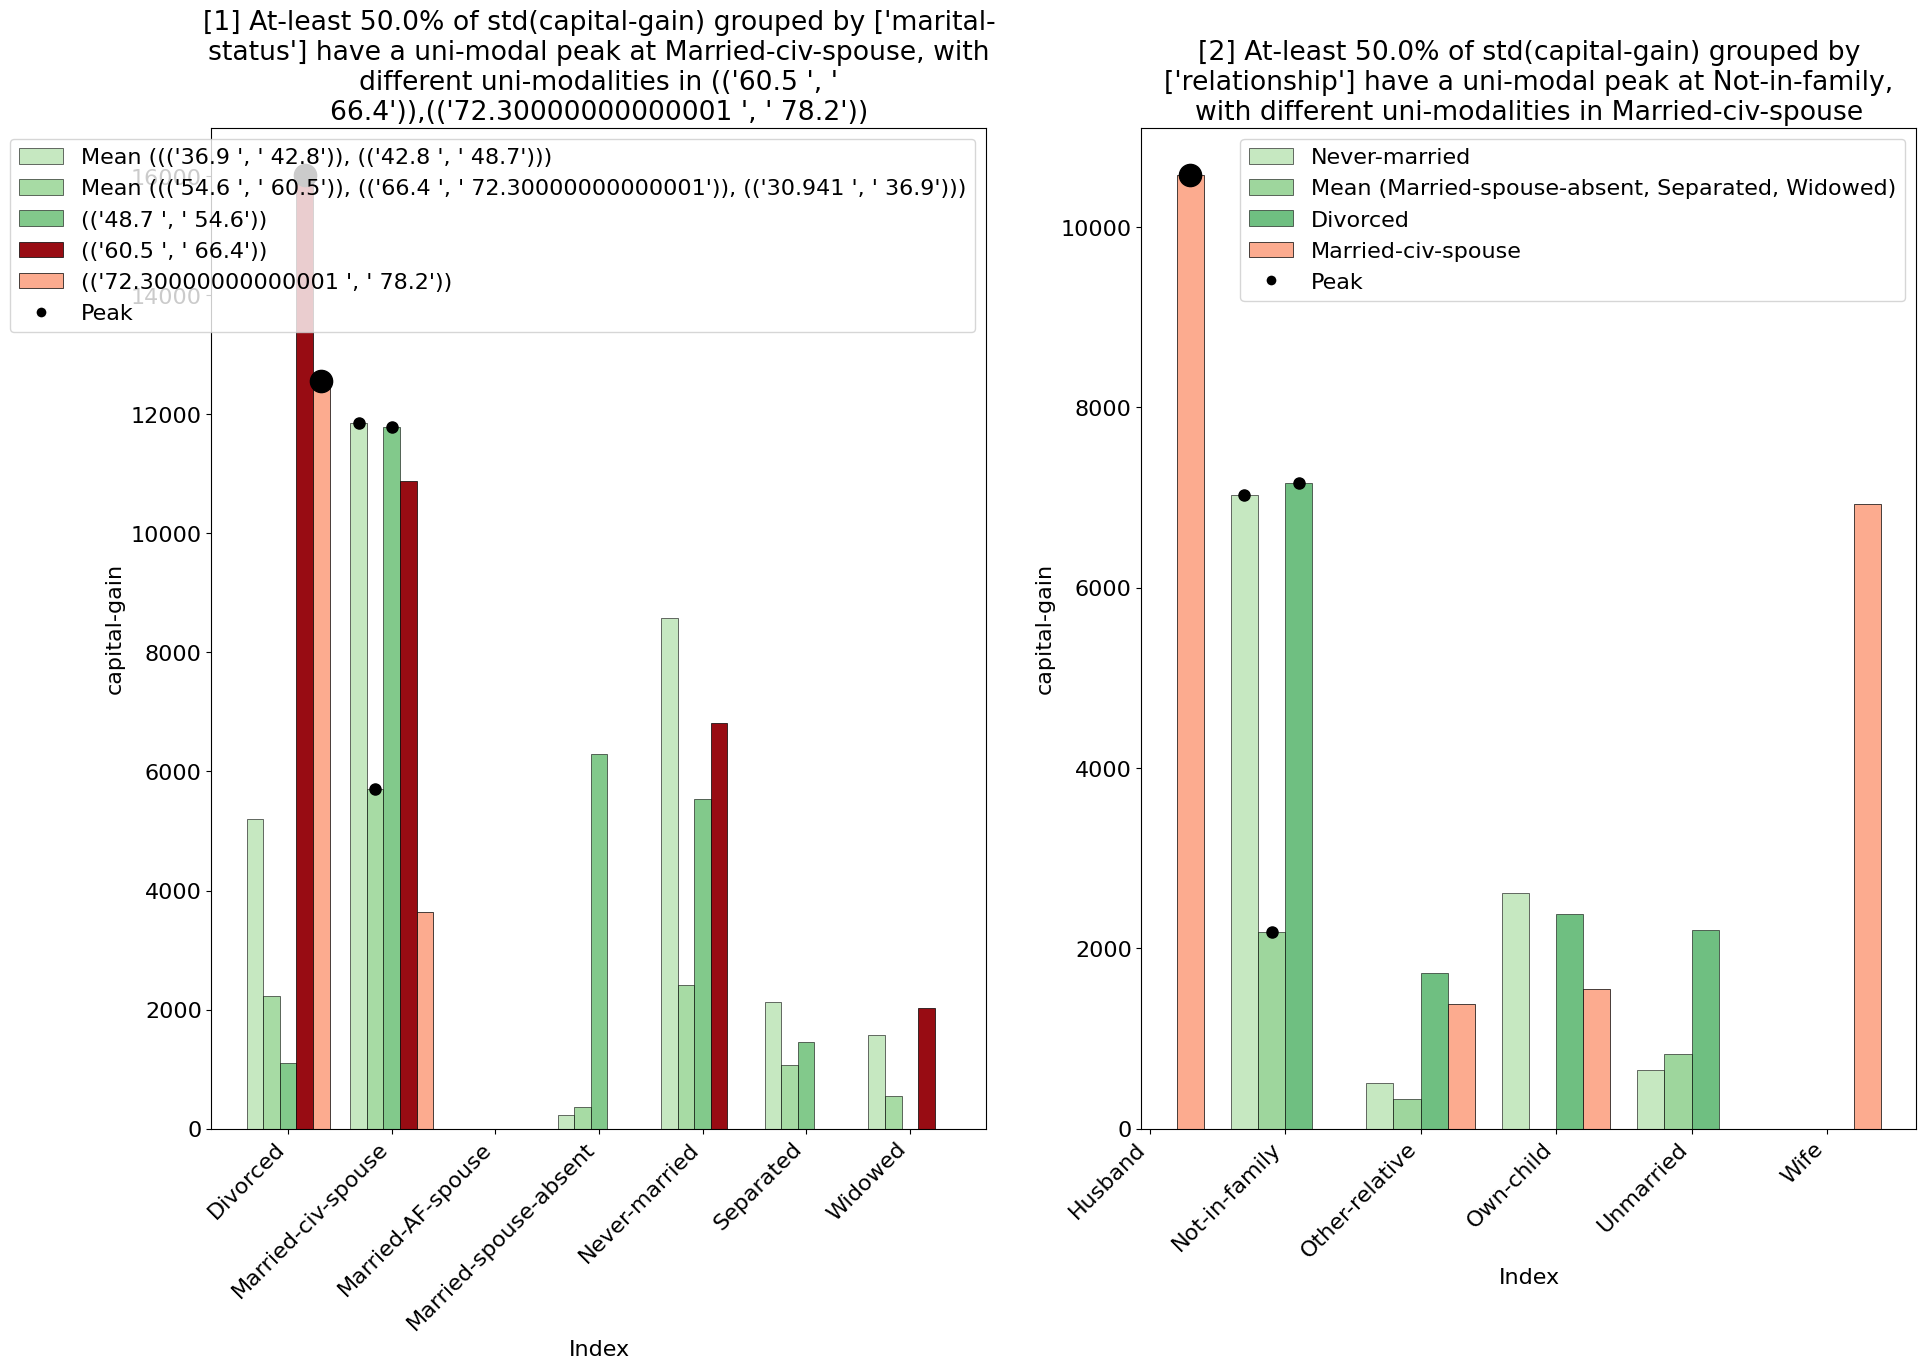

In [8]:
over_30.explain(explainer="metainsight")

## Example usage - Find patterns created by a groupby operation

The explainer can also be used to find patterns in the data created by a groupby operation.\
By default, it will use the groupby features and aggregation functions, checking over the distributions of the top k most correlated features to the grouped features.\
If there are aggregations on specific columns, those will be used. If all aggregations are done on the entire dataframe, the top k most correlated features will be used for the aggregation.

### Example 1 - Group by a single feature

In [5]:
by_marital_status = adults.groupby("marital-status").mean()
by_marital_status

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
marital-status,,,,,,
Divorced,43.159204,184749.693954,10.052917,793.675562,67.654304,41.115483
Married-AF-spouse,31.945946,184132.675676,10.432432,2971.621622,84.756757,39.810811
Married-civ-spouse,43.353724,186790.582510,10.303275,1739.700612,120.619509,43.306984
Married-spouse-absent,40.613057,197523.157643,9.377389,629.004777,63.184713,39.684713
Never-married,28.128064,195450.902836,9.972141,384.382639,54.126078,36.891357
Separated,39.725490,202974.111111,9.270588,581.842484,56.618954,39.667974
Widowed,59.377470,175529.942688,9.088274,603.644269,81.620553,33.438076


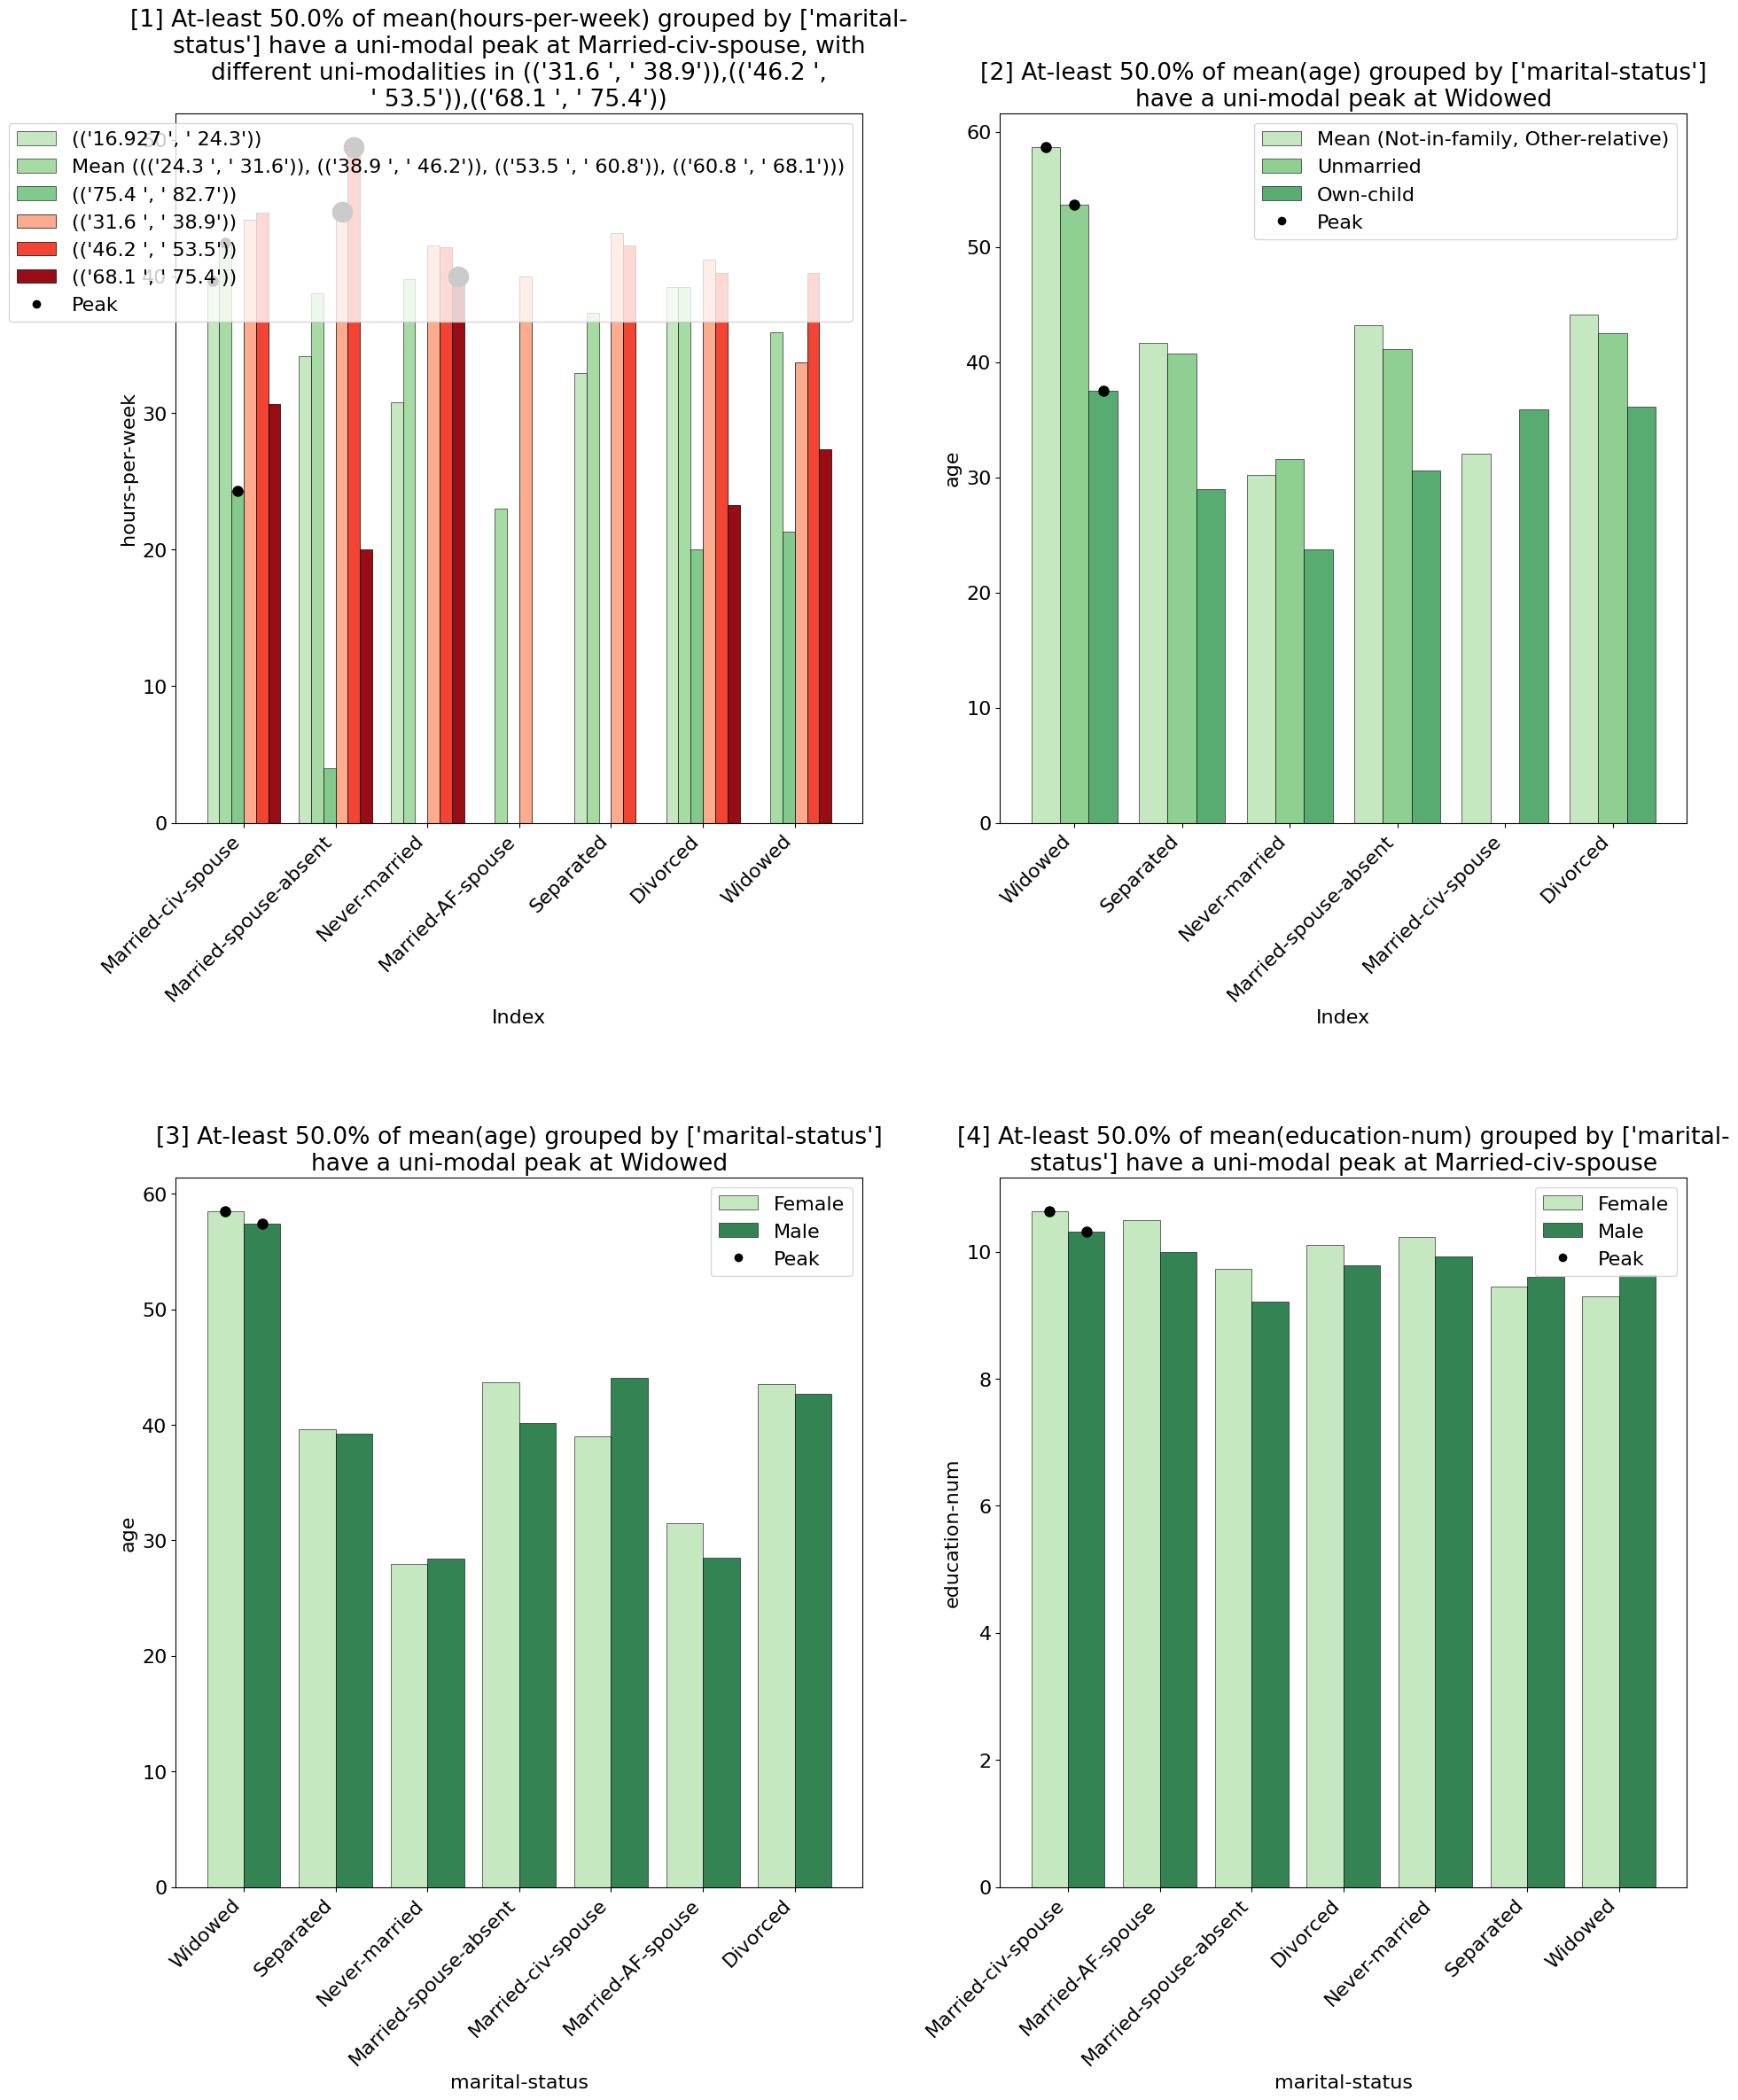

In [6]:
by_marital_status.explain(explainer="metainsight")

### Example 2 - Group by multiple features

In [7]:
by_race_sex = adults.groupby(["race", "sex"]).mean()
by_race_sex

age         fnlwgt  education-num  \
race               sex                                               
Amer-Indian-Eskimo Female  36.237838  111695.886486       9.686486   
                   Male    36.989474  125573.417544       9.192982   
Asian-Pac-Islander Female  35.657640  147260.872340      10.497099   
                   Male    38.994012  166265.160679      11.257485   
Black              Female  37.905979  214491.483536       9.591854   
                   Male    37.922592  246014.392512       9.393353   
Other              Female  31.212903  170438.845161       9.038710   
                   Male    35.167331  211324.896414       8.717131   
White              Female  36.882935  183114.027098      10.123206   
                   Male    39.704507  188609.096259      10.133461   

                           capital-gain  capital-loss  hours-per-week  
race               sex                                                 
Amer-Indian-Eskimo Female    380.621622     20.994595       37.108108  
                   Male      641.768421     48.708772       42.326316  
Asian-Pac-Islander Female    587.135397     58.348162       37.241779  
                   Male     2027.503992    114.756487       41.248503  
Black              Female    492.951906     50.949740       37.113951  
                   Male      680.668069     71.892722       40.038704  
Other              Female    920.922581     38.270968       35.987097  
                   Male     1021.697211     78.203187       41.187251  
White              Female    594.816919     64.315422       36.235818  
                   Male     1364.602192    102.975152       42.665947

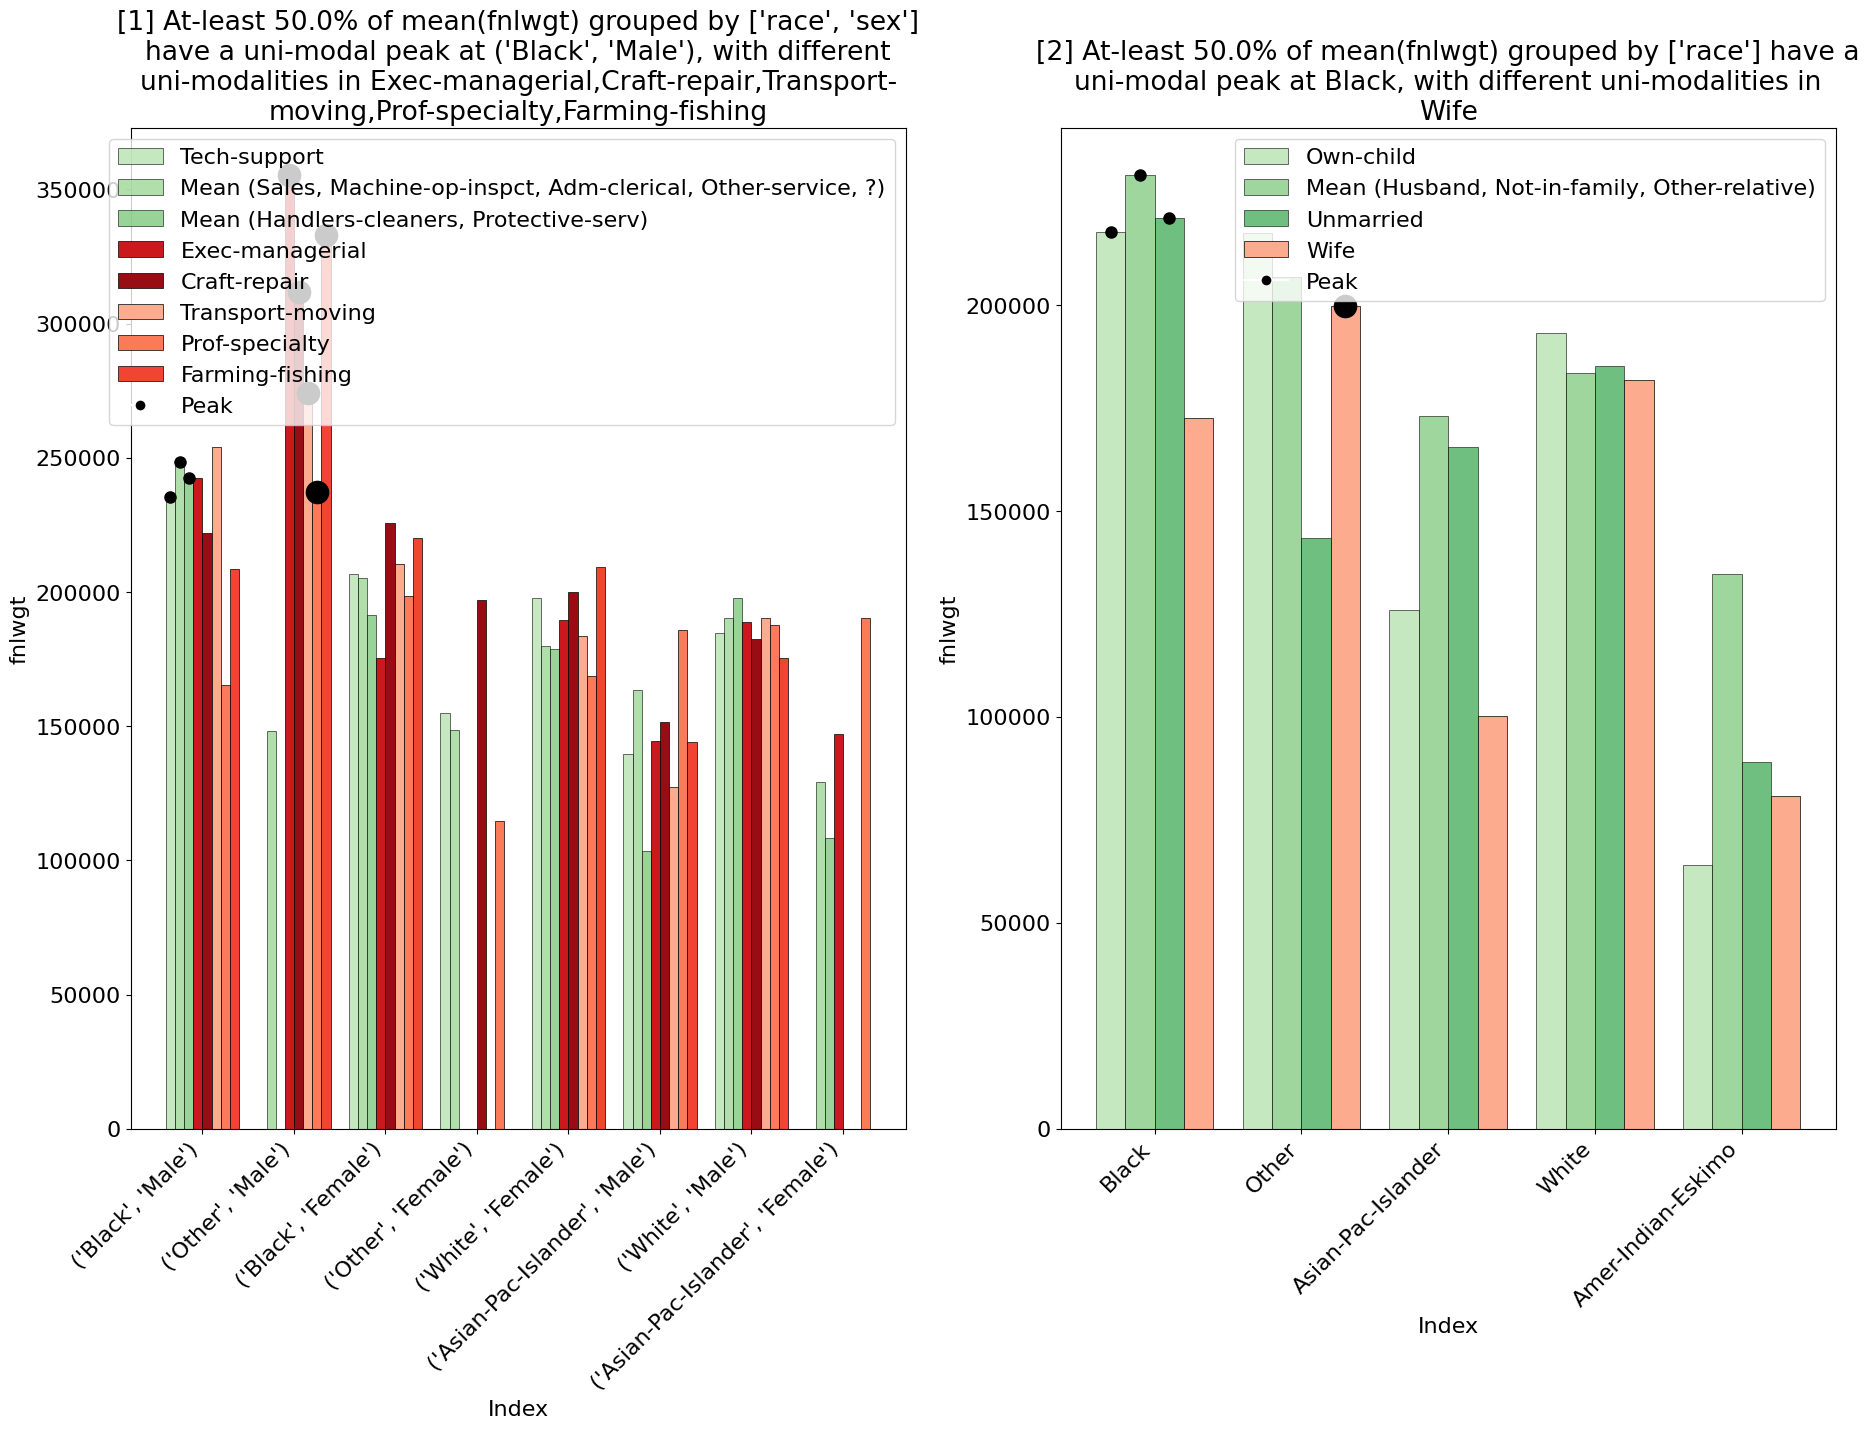

In [8]:
# Setting the use_all_groupby_combinations parameter to True means the explainer will explore using the provided multi-column groupby + all combinations of those columns. Setting this to False will only use the provided columns without any of their combinations.
by_race_sex.explain(explainer="metainsight", use_all_groupby_combinations=True)

## Advanced usage

You can also manually set the various parameters of the explainer, such as the features to group by, the aggregation functions to use, and the features to check for patterns.\
This allows for both customization of the explainer's behavior, as well as allow you to use the explainer on data that did not have operations performed on it.

### Parameters

- `top_k: int = 4` - The maximum number of MetaInsights to return. Defaults to 4.
- `min_commonness: float = 0.5` - The minimum proportion of values among the distribution that must be covered by the same pattern for it to be considered a common pattern. Defaults to 0.5.
- `no_exception_penalty_weight: float = 0.1` - The weight of the penalty for not having exceptions to the common patterns. Defaults to 0.1. Higher values will result in preferring MetaInsights with exceptions.
- `balance_factor: float = 1` - The factor that balances the weight given to exceptions, relative to the common patterns, when computing the score of a MetaInsight. Defaults to 1. Higher values will result in preferring MetaInsights with fewer exceptions.
- `filter_columns: List[str] | None = None` - The columns to filter the dataset by and check for patterns in. If None, the explainer will automatically select the top k most correlated features, depending on an operation performed on the dataset (and throw an error if no operation was performed). Defaults to None.
- `groupby_columns: List[List[[str]]] | None = None` - The columns to group the dataset by. If None, the explainer will automatically select the top k most correlated features, depending on an operation performed on the dataset (and throw an error if no operation was performed). Defaults to None.
- `aggregations: List[Tuple[str, str]] | None = None` - The aggregation functions to use on the grouped features. If None, the explainer will automatically select the top k most correlated features, depending on an operation performed on the dataset (and throw an error if no operation was performed). Defaults to None. Expected format is a list of tuples (`column_name`, `aggregation_function`).
- `correlation_aggregation_method: Literal['avg', 'max', 'sum'] = 'avg'` - The method to use for aggregation the correlation values of the features, if there are multiple filter or groupby features. Defaults to "avg".
- `use_sampling: bool = True` - Whether to use sampling to speed up the computation of the explainer. Defaults to True.
- `sample_size: int | float = 5000` - The size of the sample to use when using sampling. If an integer, it is the number of rows to sample. If a float $x \in (0,1)$, it is the proportion of the dataset to sample. Defaults to 5000.
- `max_filter_columns: int = 3` - The maximum number of filter columns to use when automatically selecting the top k most correlated features. Defaults to 3.
- `max_aggregation_columns: int = 3` - The maximum number of columns to use for aggregations when automatically selecting the top k most correlated features. Defaults to 3.
- `allow_multiple_aggregations: bool = False` -Whether to allow multiple aggregations in the same MetaInsight. Can cause the MetaInsight to be more complex and harder to interpret, but can also lead to more interesting insights.
- `allow_multiple_groupbys: bool = False` - Whether to allow multiple groupby columns in the same MetaInsight. Can cause the MetaInsight to be more complex and harder to interpret, but can also lead to more interesting insights.
- `num_bins: int = 10` - The number of bins to use when a feature is continuous. Defaults to 10.
- `use_all_groupby_combinations: bool = False` - When automatically inferring on a result of a groupby operation, whether to use all combinations of the groupby columns or just the provided ones. For example, if set to True and the groupby columns are ['A', 'B'], the groupby columns will be [['A'], ['B'], ['A', 'B']]. If set to False, only the provided groupby columns will be used.
- `figs_in_row: int = 2` - How many subplots to place in each row.
- `max_labels_in_plot: int = 8` - The maximum number of labels to display per plot. If there are more labels, they will be truncated. There may be more labels than this number in the final plot if there are more than this number of indexes with highlights in them.
- `max_common_categories_per_plot: int = 3` - The maximum number of common categories to display per plot. If there are more categories, they will be grouped together and their average value will be displayed.

### Example usage - Manually set the parameters to explore the dataset

Note that the more filter columns, groupby columns and aggregations there are, the longer the computation will take.

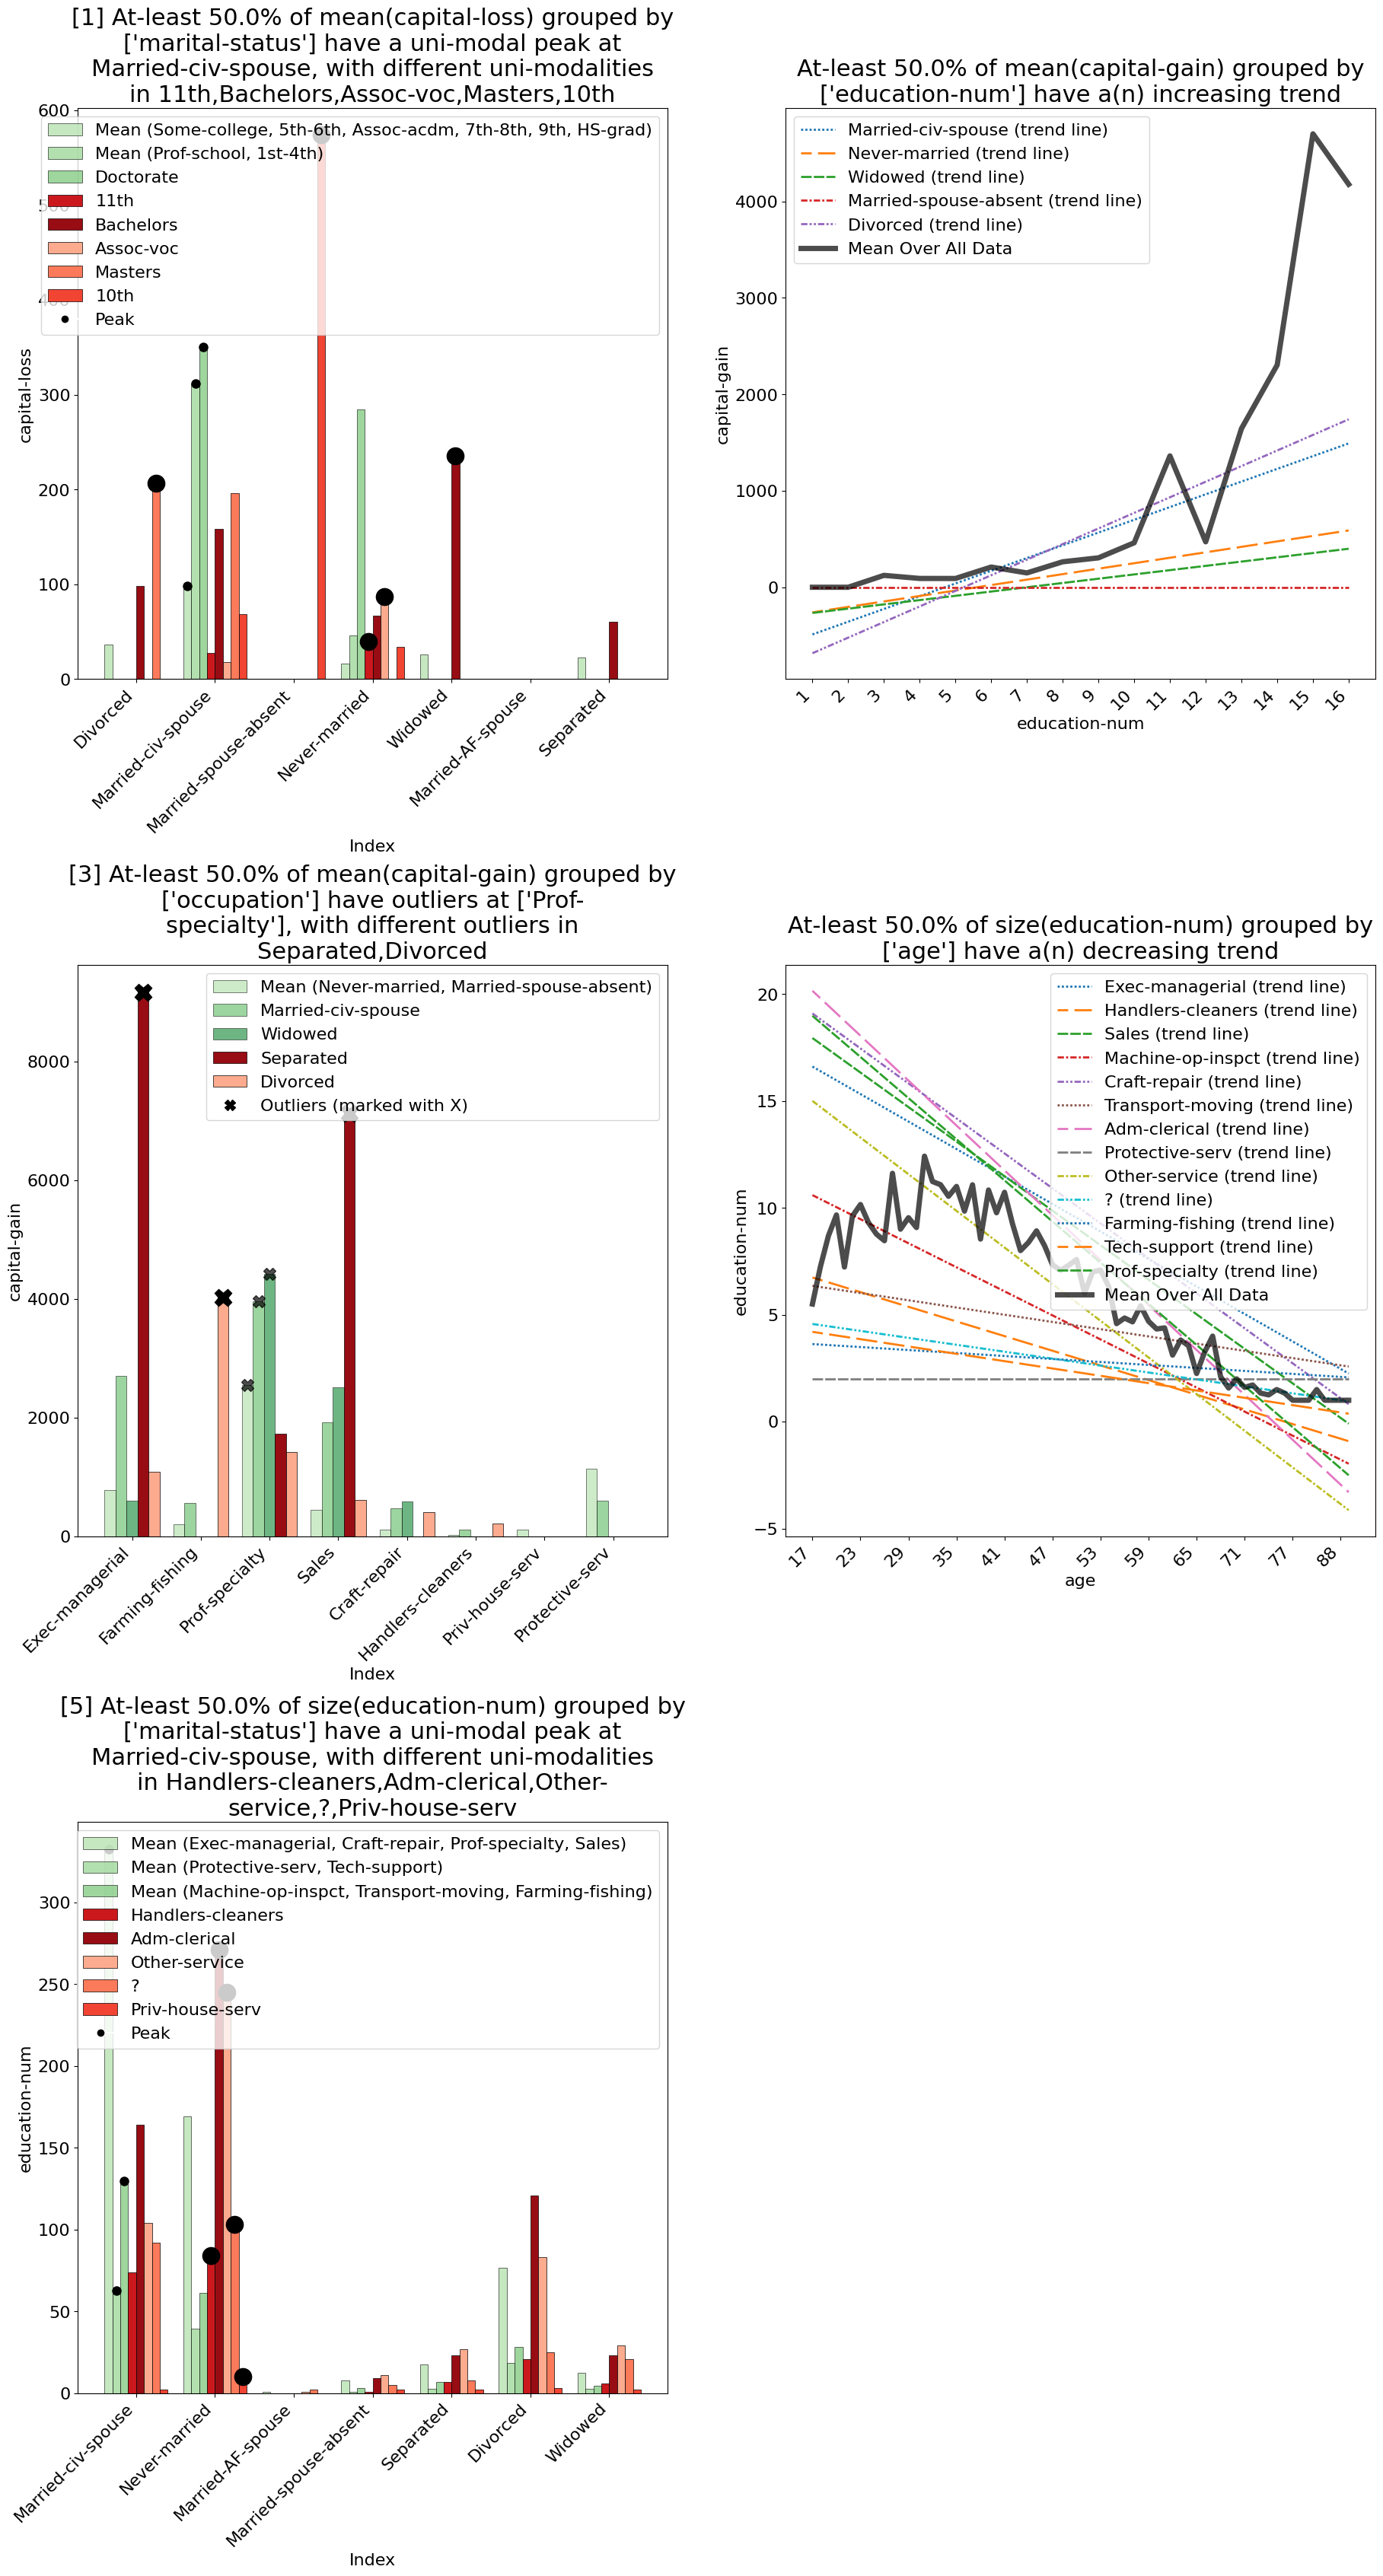

In [4]:
adults.explain(
    explainer="metainsight",
    top_k=5,
    # It is enough to only set either filter_columns or groupby_columns + aggregations, and automatically the explainer will infer the other via correlation. In this case we set both for full manual control.
    filter_columns=['education', 'occupation', 'marital-status'],
    groupby_columns = [['age'],
                            ['education-num'],
                            ['occupation'],
                            ['marital-status'],
                            ],
    aggregations=[
                ('capital-gain', 'mean'),
                ('capital-loss', 'mean'),
                ('hours-per-week', 'sem'),
                ('income', 'count'),
                ('education-num', 'size'),
                ],
)